# Hospital Case Classification Model Analysis

## This is a hospital case data set downloaded from Kaggle. The main goal of this important project is to develop a classification model that can accurately classify the degree of illness based on three categories, which are:
## Extreme
## Moderate
## Minor

## And the end result was fairly satisfying.

In [36]:
# The needed modules for this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Read and open the data

hospt_case = pd.read_csv('host_train.csv')
hospt_case

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,1,8,2,3,2,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,2,5,2,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,4,1,0,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,1,2,1,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,1,2,1,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,0,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,20-Nov
318434,318435,24,0,1,0,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,0,4,0,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,20-Nov
318436,318437,11,1,2,1,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,20-Nov,3761,20-Nov


In [3]:
hospt_case['Admission_Deposit'].head(20)

0     4911
1     5954
2     4745
3     7272
4     5558
5     4449
6     6167
7     5571
8     7223
9     6056
10    5797
11    5993
12    5141
13    8477
14    2685
15    9398
16    2933
17    5342
18    7442
19    5155
Name: Admission_Deposit, dtype: int64

In [4]:
# General information about the data set

hospt_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital                           318438 non-null  int64  
 2   Hospital_type                      318438 non-null  int64  
 3   Hospital_city                      318438 non-null  int64  
 4   Hospital_region                    318438 non-null  int64  
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility                      318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [5]:
# counts of each feature in the data set

hospt_case.count()

case_id                              318438
Hospital                             318438
Hospital_type                        318438
Hospital_city                        318438
Hospital_region                      318438
Available_Extra_Rooms_in_Hospital    318438
Department                           318438
Ward_Type                            318438
Ward_Facility                        318438
Bed_Grade                            318325
patientid                            318438
City_Code_Patient                    313906
Type of Admission                    318438
Illness_Severity                     318438
Patient_Visitors                     318438
Age                                  318438
Admission_Deposit                    318438
Stay_Days                            318438
dtype: int64

In [6]:
# The total rows in the data set
hospt_case.shape[0]

318438

In [7]:
# The total columns in the data set

hospt_case.shape[1]

18

In [8]:
# Check for any possible duplicates in the data set

hospt_case.duplicated().sum()

0

In [9]:
# Drop the case_id column

hospt_case.drop('case_id', axis=1, inplace=True)

In [10]:
# Obtain statistical information about the data set

hospt_case.describe(include='all')

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438,318438,318438,318325.000000,318438.000000,313906.000000,318438,318438,318438.000000,318438,318438.000000,318438
unique,NaN,NaN,NaN,NaN,NaN,5,6,6,NaN,NaN,NaN,3,3,NaN,10,NaN,11
top,NaN,NaN,NaN,NaN,NaN,gynecology,R,F,NaN,NaN,NaN,Trauma,Moderate,NaN,41-50,NaN,21-30
freq,NaN,NaN,NaN,NaN,NaN,249486,127947,112753,NaN,NaN,NaN,152261,175843,NaN,63749,NaN,87491
mean,18.318841,1.256841,4.771717,0.778098,3.197627,NaN,NaN,NaN,2.625807,65747.579472,7.251859,NaN,NaN,3.284099,NaN,4880.749392,NaN
std,8.633755,1.535712,3.102535,0.752527,1.168171,NaN,NaN,NaN,0.873146,37979.936440,4.745266,NaN,NaN,1.764061,NaN,1086.776254,NaN
min,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,1800.000000,NaN
25%,11.000000,0.000000,2.000000,0.000000,2.000000,NaN,NaN,NaN,2.000000,32847.000000,4.000000,NaN,NaN,2.000000,NaN,4186.000000,NaN
50%,19.000000,1.000000,5.000000,1.000000,3.000000,NaN,NaN,NaN,3.000000,65724.500000,8.000000,NaN,NaN,3.000000,NaN,4741.000000,NaN
75%,26.000000,2.000000,7.000000,1.000000,4.000000,NaN,NaN,NaN,3.000000,98470.000000,8.000000,NaN,NaN,4.000000,NaN,5409.000000,NaN


In [11]:
# Null check

hospt_case.isnull().sum()

Hospital                                0
Hospital_type                           0
Hospital_city                           0
Hospital_region                         0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility                           0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Illness_Severity                        0
Patient_Visitors                        0
Age                                     0
Admission_Deposit                       0
Stay_Days                               0
dtype: int64

In [12]:
# Check the Bed_Grade column median value

hospt_case['Bed_Grade'].median()

3.0

In [13]:
# # Replace the null values  in Bed_Grade column with its median value

hospt_case['Bed_Grade'].fillna(3.0, inplace=True)

In [14]:
# Check the City_Code_Patient column median 

hospt_case['City_Code_Patient'].median()

8.0

In [15]:
# # Replace the null values  in City_Code_Patient column with its median value

hospt_case['City_Code_Patient'].fillna(8.0, inplace=True)

In [16]:
# Confirm that there are no nulls in the data set again

hospt_case.isnull().sum()

Hospital                             0
Hospital_type                        0
Hospital_city                        0
Hospital_region                      0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility                        0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Illness_Severity                     0
Patient_Visitors                     0
Age                                  0
Admission_Deposit                    0
Stay_Days                            0
dtype: int64

In [17]:
# Detecting correlations amongst the numeric variables

corr_matrix = hospt_case.corr()
corr_matrix.style.background_gradient()

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Patient_Visitors,Admission_Deposit
Hospital,1.000000,0.039449,0.128294,-0.135920,-0.059638,-0.013948,0.002291,-0.015477,-0.028500,0.045446
Hospital_type,0.039449,1.000000,-0.000839,0.268962,-0.103044,0.018642,-0.003010,0.055272,-0.045213,0.025341
Hospital_city,0.128294,-0.000839,1.000000,0.008311,-0.045771,-0.049248,0.000750,-0.024161,0.018184,-0.034455
Hospital_region,-0.135920,0.268962,0.008311,1.000000,-0.006906,-0.042680,-0.002083,0.150714,-0.019485,0.075092
Available_Extra_Rooms_in_Hospital,-0.059638,-0.103044,-0.045771,-0.006906,1.000000,-0.115804,0.000921,-0.009462,0.096714,-0.143739
Bed_Grade,-0.013948,0.018642,-0.049248,-0.042680,-0.115804,1.000000,0.001638,-0.007581,0.088920,0.073779
patientid,0.002291,-0.003010,0.000750,-0.002083,0.000921,0.001638,1.000000,0.002009,0.006889,-0.000877
City_Code_Patient,-0.015477,0.055272,-0.024161,0.150714,-0.009462,-0.007581,0.002009,1.000000,-0.011677,0.025485
Patient_Visitors,-0.028500,-0.045213,0.018184,-0.019485,0.096714,0.088920,0.006889,-0.011677,1.000000,-0.150358
Admission_Deposit,0.045446,0.025341,-0.034455,0.075092,-0.143739,0.073779,-0.000877,0.025485,-0.150358,1.000000


In [18]:
corr_matrix['Admission_Deposit']

Hospital                             0.045446
Hospital_type                        0.025341
Hospital_city                       -0.034455
Hospital_region                      0.075092
Available_Extra_Rooms_in_Hospital   -0.143739
Bed_Grade                            0.073779
patientid                           -0.000877
City_Code_Patient                    0.025485
Patient_Visitors                    -0.150358
Admission_Deposit                    1.000000
Name: Admission_Deposit, dtype: float64

In [19]:
# Drop any unwanted columns in the data set

rat = hospt_case.drop('patientid',  axis=1, inplace=True)
rat = hospt_case.drop('Age',  axis=1, inplace=True)
rat = hospt_case.drop('Stay_Days',  axis=1, inplace=True)


In [20]:
# Create the predictor variable or x_axis column

inputs = hospt_case.drop('Illness_Severity', axis=1)
inputs

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,City_Code_Patient,Type of Admission,Patient_Visitors,Admission_Deposit
0,8,2,3,2,3,radiotherapy,R,F,2.0,7.0,Emergency,2,4911
1,2,2,5,2,2,radiotherapy,S,F,2.0,7.0,Trauma,2,5954
2,10,4,1,0,2,anesthesia,S,E,2.0,7.0,Trauma,2,4745
3,26,1,2,1,2,radiotherapy,R,D,2.0,7.0,Trauma,2,7272
4,26,1,2,1,2,radiotherapy,S,D,2.0,7.0,Trauma,2,5558
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,0,6,0,3,radiotherapy,Q,F,4.0,23.0,Emergency,3,4144
318434,24,0,1,0,2,anesthesia,Q,E,4.0,8.0,Urgent,4,6699
318435,7,0,4,0,3,gynecology,R,F,4.0,10.0,Emergency,3,4235
318436,11,1,2,1,3,anesthesia,Q,D,3.0,8.0,Trauma,5,3761


In [21]:
# Create the label variable or y_axis column

target = hospt_case['Illness_Severity'].copy()
target

0          Extreme
1          Extreme
2          Extreme
3          Extreme
4          Extreme
            ...   
318433    Moderate
318434    Moderate
318435       Minor
318436       Minor
318437       Minor
Name: Illness_Severity, Length: 318438, dtype: object

In [22]:
# Split the data into relevant categories

x_train, x_test, y_train, y_test = train_test_split(inputs,target, test_size = 0.2, random_state=42)
x_train

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,City_Code_Patient,Type of Admission,Patient_Visitors,Admission_Deposit
231676,19,0,7,1,4,gynecology,Q,C,2.0,8.0,Emergency,4,6247
166821,19,0,7,1,2,radiotherapy,S,C,1.0,2.0,Emergency,6,8000
70566,26,1,2,1,2,radiotherapy,R,D,3.0,7.0,Emergency,3,4987
197982,26,1,2,1,2,gynecology,Q,D,3.0,14.0,Trauma,3,7210
280389,18,3,13,1,4,radiotherapy,R,B,2.0,8.0,Urgent,2,3178
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,11,1,2,1,2,gynecology,Q,D,4.0,8.0,Trauma,2,4727
259178,15,2,5,2,4,gynecology,P,F,2.0,6.0,Urgent,5,6568
131932,23,0,6,0,2,gynecology,R,F,4.0,2.0,Urgent,2,6234
146867,15,2,5,2,4,gynecology,Q,F,3.0,5.0,Urgent,4,3973


In [23]:
# Use Pipeline to transform and scale the data

num = ['Hospital','Hospital_type','Hospital_city','Hospital_region','Available_Extra_Rooms_in_Hospital','Bed_Grade','City_Code_Patient','Patient_Visitors', 'Admission_Deposit']
cate = ['Department', 'Ward_Type', 'Ward_Facility','Type of Admission']

Pipe = ColumnTransformer([
    ('scaler', StandardScaler(), num),
    ('category', OneHotEncoder(), cate)
])

predictors= Pipe.fit_transform(x_train)
predictors


array([[ 0.07956407, -0.81839817,  0.71756752, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.07956407, -0.81839817,  0.71756752, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.89055827, -0.16610598, -0.89322092, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.54298933, -0.81839817,  0.39540983, ...,  0.        ,
         0.        ,  1.        ],
       [-0.38386119,  0.48618621,  0.07325215, ...,  0.        ,
         0.        ,  1.        ],
       [-0.15214856,  1.79077059, -1.2153786 , ...,  1.        ,
         0.        ,  0.        ]])

In [24]:
# Convert the built pipeline into dataframe and label it 

labels = ['Hospital','Hospital_type','Hospital_city','Hospital_region','Available_Extra_Rooms_in_Hospital','Bed_Grade','City_Code_Patient','Patient_Visitors', 'Admission_Deposit', 'gynecology', 'anesthesia', 'radiotherapy', 'TB $ Chest disease', 'surgery', 'R', 'Q', 'S', 'P', 'T', 'U', 'F', 'E', 'D', 'C', 'B', 'A', 'Trauma', 'Emergency', 'Urgent']
table = pd.DataFrame(predictors)
table.columns = labels
table

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Bed_Grade,City_Code_Patient,Patient_Visitors,Admission_Deposit,gynecology,...,U,F,E,D,C,B,A,Trauma,Emergency,Urgent
0,0.079564,-0.818398,0.717568,0.293669,0.685853,-0.717639,0.159461,0.405139,1.257976,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.079564,-0.818398,0.717568,0.293669,-1.024005,-1.863493,-1.118435,1.538135,2.870765,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.890558,-0.166106,-0.893221,0.293669,-1.024005,0.428214,-0.053522,-0.161359,0.098755,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.890558,-0.166106,-0.893221,0.293669,-1.024005,0.428214,1.437356,-0.161359,2.143952,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.036292,1.138478,2.650514,0.293669,0.685853,-0.717639,0.159461,-0.727857,-1.565556,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254745,-0.847286,-0.166106,-0.893221,0.293669,-1.024005,1.574067,0.159461,-0.727857,-0.140450,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
254746,-0.383861,0.486186,0.073252,1.622388,0.685853,-0.717639,-0.266505,0.971637,1.553301,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
254747,0.542989,-0.818398,0.395410,-1.035050,-1.024005,1.574067,-1.118435,-0.727857,1.246015,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
254748,-0.383861,0.486186,0.073252,1.622388,0.685853,0.428214,-0.479487,0.405139,-0.834142,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Logistic Regression Model

In [25]:
# Build a Logistic Model

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)

model.fit(predictors, y_train)
pred = model.predict(predictors)
confusion_matrix1 = confusion_matrix(pred, y_train)
confusion_matrix1

array([[   557,     14,    201],
       [  2698,  11332,  11726],
       [ 42167,  57269, 128786]], dtype=int64)

In [26]:
# Output the model accuracy

accuracy_score(pred, y_train)

0.5522080471050049

In [27]:
# Evaluate your training data

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, predictors, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
n_scores

array([0.55368008, 0.55116781, 0.55222767,        nan,        nan,
              nan, 0.55214917, 0.54904809, 0.55218842,        nan,
       0.55187439, 0.55085378,        nan,        nan, 0.55112856,
              nan,        nan, 0.54916585, 0.55422964, 0.55458292,
       0.5524632 , 0.55171737, 0.55368008,        nan,        nan,
              nan, 0.55128557,        nan, 0.55415113, 0.55187439])

# SGDClassifier Model

In [28]:
# Build a SGDClassifier model

sgd = SGDClassifier(loss='hinge', alpha=0.5, random_state=42)
sgd.fit(predictors, y_train)

scores = cross_val_score(sgd, predictors, y_train, cv=5, scoring='accuracy')
scores

array([0.55236506, 0.55236506, 0.55236506, 0.55234544, 0.55234544])

In [29]:
# Check the confusion_matrix of the model

pred3 = sgd.predict(predictors)
confusion_matrix1 = confusion_matrix(pred3, y_train)
confusion_matrix1

array([[     0,      0,      0],
       [     0,      0,      0],
       [ 45422,  68615, 140713]], dtype=int64)

In [30]:
# Check the score of the model 

accuracy_score(pred3, y_train)

0.5523572129538763

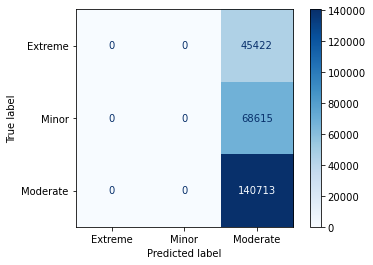

In [31]:
# Plot the confusion_matrix output

plot = plot_confusion_matrix(sgd, predictors, y_train, cmap=plt.cm.Blues)
plot

# KNNeighbors Model

In [32]:
# Build a KNNeighbors Model

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(predictors, y_train)

y_pred = knn.predict(predictors)
y_pred

array(['Moderate', 'Extreme', 'Minor', ..., 'Moderate', 'Moderate',
       'Extreme'], dtype=object)

In [33]:
# Get the model score

knn.score(predictors, y_train)

0.7184376840039254

In [34]:
# Check the model confusion_matrix

cm = confusion_matrix(y_train, y_pred)
cm

array([[ 28705,   2802,  13915],
       [ 10374,  39913,  18328],
       [ 14359,  11950, 114404]], dtype=int64)

In [37]:
# Output the classification report

classification_report(y_train, y_pred)

'              precision    recall  f1-score   support\n\n     Extreme       0.54      0.63      0.58     45422\n       Minor       0.73      0.58      0.65     68615\n    Moderate       0.78      0.81      0.80    140713\n\n    accuracy                           0.72    254750\n   macro avg       0.68      0.68      0.67    254750\nweighted avg       0.72      0.72      0.72    254750\n'

# GridSearchCV Model

In [38]:
# Fine_tune your model using GridSearchCV

knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [39]:
# Use GridSearchCV to fine-tune your model for better evaluation 
param_grid = {
'algorithm': ['auto'],
 'leaf_size': [30],
 'metric': ['minkowski'],
 'metric_params': [None],
 'n_jobs': [None],
 'n_neighbors': [3],
 'p': [2],
 'weights': ['uniform']}
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',return_train_score=False)

grid_search.fit(predictors, y_train)
best_accuracy = grid_search.best_score_
best_parameter = grid_search.best_params_

print('Best Accuracy: {:.2f} %'.format(best_accuracy.mean()* 100))

Best Accuracy: 48.28 %


# Final System Evaluation! 

In [40]:
# final model!
final_model = knn
X_test_input = Pipe.transform(x_test)
knn.fit(X_test_input, y_test)

final_predictions = final_model.predict(X_test_input)


In [41]:
# Get the final model score 

knn.score(X_test_input, y_test)

0.7191464640120588

In [42]:
# # Check the final model confusion_matrix

cm = confusion_matrix(y_test, final_predictions)
cm

array([[ 7037,   709,  3555],
       [ 2601, 10183,  4473],
       [ 3553,  2996, 28581]], dtype=int64)

In [43]:
# # Output the classification report

classification_report(y_test, final_predictions)

'              precision    recall  f1-score   support\n\n     Extreme       0.53      0.62      0.57     11301\n       Minor       0.73      0.59      0.65     17257\n    Moderate       0.78      0.81      0.80     35130\n\n    accuracy                           0.72     63688\n   macro avg       0.68      0.68      0.68     63688\nweighted avg       0.72      0.72      0.72     63688\n'

# Final notes

## The following models were used in this project; Logistic Regression, SGDClassifier, GridSearchCV, and KNNeighbors models.

## KNNeighbors model scored the least errors amongst other models used in this project. It produced 71.91% accuracy and was used to evaluate the test data.

## Finally, for better improvement this data set needs more data from its source.